# **Name : Surendra Prajapat**

Problem staement : 
Predict the percentage of a student based on the no. of study hours.

In [56]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [57]:
data = pd.read_csv("http://bit.ly/w-data")
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [58]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [59]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [60]:
data.shape

(25, 2)

In [61]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


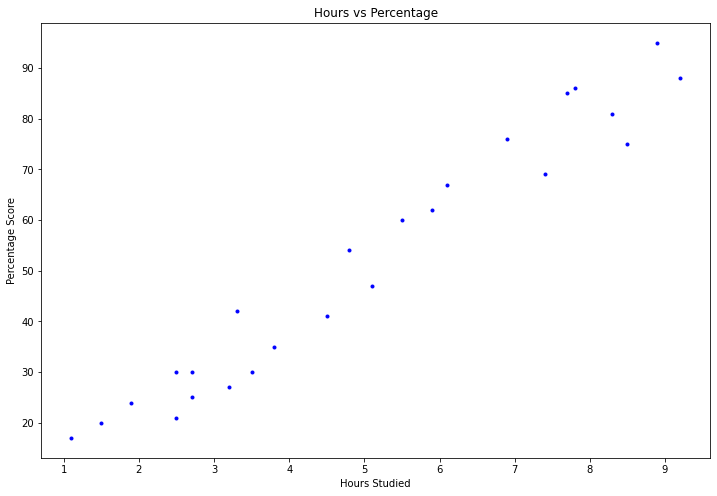

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(data.Hours,data.Scores,marker='.',color='b')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

Spliting the data in test and train data

In [63]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=2)

In [65]:
print(x_train, y_train)

[[2.7]
 [8.5]
 [2.5]
 [4.5]
 [3.8]
 [3.5]
 [7.7]
 [1.5]
 [7.4]
 [5.1]
 [3.2]
 [5.5]
 [4.8]
 [2.7]
 [6.1]
 [5.9]
 [7.8]
 [3.3]
 [8.9]
 [8.3]] [25 75 30 41 35 30 85 20 69 47 27 60 54 30 67 62 86 42 95 81]


In [66]:
print(x.shape, x_train.shape, x_test.shape)

(25, 1) (20, 1) (5, 1)


In [67]:
model = LinearRegression()

In [68]:
model.fit(x_train, y_train)

LinearRegression()

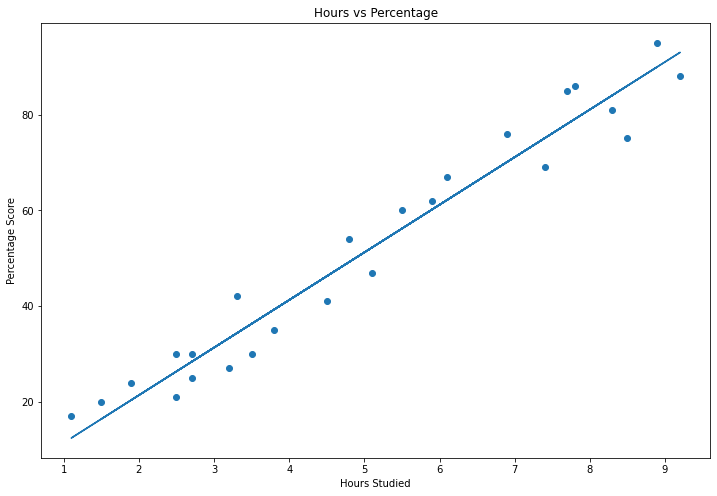

In [69]:
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.plot(x, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [70]:
y_prediction = model.predict(x_train)

In [71]:
training_data_accuracy = model.score(x_train, y_train)*100
print("Training data accuracy: ", training_data_accuracy)

Training data accuracy:  94.23348138802984


In [72]:
test_data_accuracy = model.score(x_test, y_test)*100
print("Test data accuracy: ", test_data_accuracy)

Test data accuracy:  97.35538080811827


In [73]:
y_test

array([17, 21, 24, 88, 76])

In [74]:
y_prediction

array([28.34757137, 86.0031392 , 26.35944834, 46.24067863, 39.28224803,
       36.30006348, 78.05064708, 16.4188332 , 75.06846254, 52.20504771,
       33.31787894, 56.18129377, 49.22286317, 28.34757137, 62.14566286,
       60.15753983, 79.0447086 , 34.31194046, 89.97938526, 84.01501617])

In [75]:
dataframe = pd.DataFrame({'Real': y_test,'Predicted': y_prediction[:5]})
dataframe

,Real,Predicted
0,17,28.347571
1,21,86.003139
2,24,26.359448
3,88,46.240679
4,76,39.282248


In [76]:
print('Score of student who studied for 9.25 hours a dat', model.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [93.45860056]


Model Eveluation

In [77]:
mean_sqr_err = mean_squared_error(y_test,y_prediction[:5])
print("Mean_squared_error: ",mean_sqr_err)

Mean_squared_error:  1490.3553419500645


In [78]:
mean_abs_err=mean_absolute_error(y_test,y_prediction[:5])
print("Mean_absolute_error: ",mean_abs_err)

Mean_absolute_error:  31.437446451154955
